In [1]:
from google.colab import drive

# mount google drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
!git clone https://github.com/FranciscoLozCoding/cooling_with_code.git
%cd cooling_with_code
!git pull

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
fatal: destination path 'cooling_with_code' already exists and is not an empty directory.
/content/drive/My Drive/cooling_with_code
Already up to date.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
csv_path = 'data/train/300m_buffer_dataset.csv'  # Adjust the path to your CSV file
df = pd.read_csv(csv_path)

KNN Model with All Features:
Mean Absolute Error (MAE): 0.0025582444401602827
R² Score: 0.9496236679245735


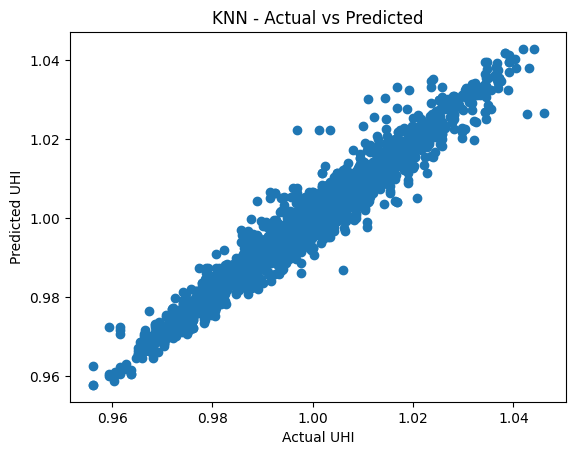

In [4]:
#separating the features and target
X = df.drop(columns=['UHI'])
y = df['UHI']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# building the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#Evaluate the model
y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("KNN Model with All Features:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Ploting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual UHI')
plt.ylabel('Predicted UHI')
plt.title('KNN - Actual vs Predicted')
plt.show()


In [5]:
from sklearn.metrics import r2_score

# Compute R² for training data (in-sample)
train_r2 = r2_score(y_train, knn.predict(X_train))

# Compute R² for test data (out-sample)
test_r2 = r2_score(y_test, knn.predict(X_test))

print("In-Sample R² (Training):", train_r2)
print("Out-Sample R² (Testing):", test_r2)

In-Sample R² (Training): 0.9716277400274926
Out-Sample R² (Testing): 0.9496236679245735


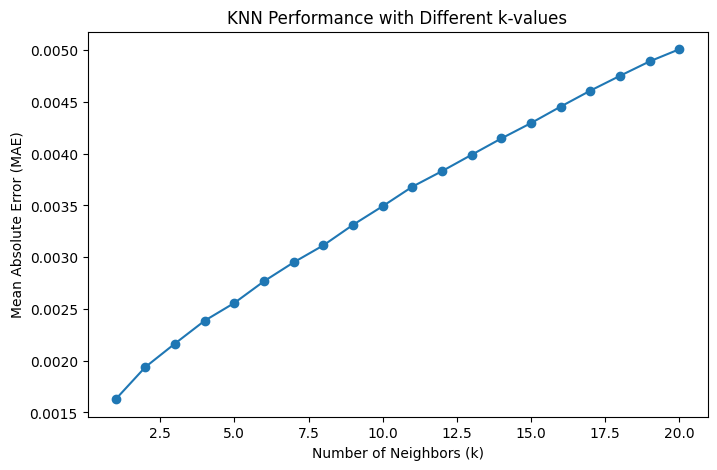

In [10]:
#Hyperparameter Tuning: Trying different values of k
neighbors_range = range(1, 21)
mean_mae = []
for k in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    mae_k = mean_absolute_error(y_test, y_pred_k)
    mean_mae.append(mae_k)

# Plot the performance with different k-values
plt.figure(figsize=(8, 5))
plt.plot(neighbors_range, mean_mae, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('KNN Performance with Different k-values')
plt.show()

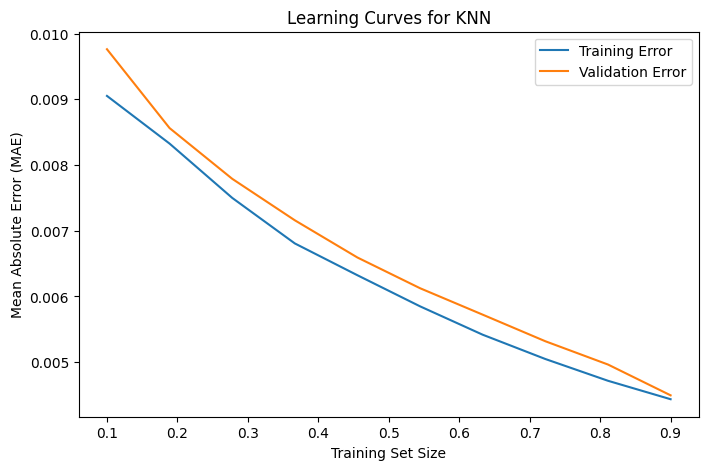

In [11]:
# Learning Curves: Plotting training and validation errors as function of sample size
train_sizes = np.linspace(0.1, 0.9, 10)  # From 10% to 90% of the training data
train_errors = []
val_errors = []

for train_size in train_sizes:
    # Train on a subset of data
    X_train_subset, _, y_train_subset, _ = train_test_split(X_scaled, y, train_size=train_size, random_state=42)

    # Fit the model
    knn.fit(X_train_subset, y_train_subset)

    # Calculate training and validation errors
    train_errors.append(mean_absolute_error(y_train_subset, knn.predict(X_train_subset)))
    val_errors.append(mean_absolute_error(y_test, knn.predict(X_test)))

# Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, val_errors, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curves for KNN')
plt.legend()
plt.show()


Optimal k: 1
KNN Model with Optimal k:
Mean Absolute Error (MAE): 0.0016281381843276943
R² Score: 0.9630717386784178


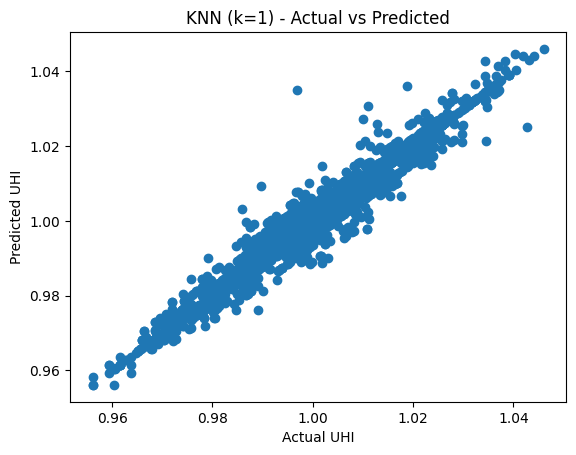

In [12]:
# Find the best k (smallest MAE)
best_k = neighbors_range[np.argmin(mean_mae)]
print(f"Optimal k: {best_k}")

# Retrain KNN with the best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_best = knn_best.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("KNN Model with Optimal k:")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"R² Score: {r2_best}")

# Plot actual vs predicted for best k
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual UHI')
plt.ylabel('Predicted UHI')
plt.title(f'KNN (k={best_k}) - Actual vs Predicted')
plt.show()


The model has showed great and improved results with the optimal k value. With a 0.0016 MAE and 0.963 R2. This conclude that the mdel fits the daa well and provide prediction of UHI index.


In [8]:
from sklearn.model_selection import cross_val_score

# Cross-validation for KNN model with K=1
knn_cv = KNeighborsRegressor(n_neighbors=1)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_cv, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

# Display the cross-validation scores
print(f"Cross-Validation MAE Scores: {-cv_scores}")
print(f"Mean Cross-Validation MAE: {-cv_scores.mean()}")


Cross-Validation MAE Scores: [0.01467139 0.0132098  0.01489194 0.01539268 0.01852169]
Mean Cross-Validation MAE: 0.015337500326312637


The model's cross-validation MAE scores were as follows: [0.0147, 0.0132, 0.0149, 0.0154, 0.0185]. The mean cross-validation MAE was 0.0153, further demonstrating the model's consistent performance across different subsets of the data. This reinforces the reliability and stability of the model's predictions.

In [9]:
from sklearn.metrics import r2_score

# Compute R² for training data (in-sample)
train_r2 = r2_score(y_train, knn.predict(X_train))

# Compute R² for test data (out-sample)
test_r2 = r2_score(y_test, knn.predict(X_test))

print("In-Sample R² (Training):", train_r2)
print("Out-Sample R² (Testing):", test_r2)


In-Sample R² (Training): 0.8611370343075497
Out-Sample R² (Testing): 0.861179311216352
